# **Preparations**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

base_dir = '/content/drive/MyDrive/Banana Ripeness Classification'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/valid'))

Contents of base directory:
['train', 'valid']

Contents of train directory:
['overripe', 'ripe', 'rotten', 'unripe']

Contents of validation directory:
['unripe', 'overripe', 'ripe', 'rotten']


In [3]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')

# Directory with training pictures
train_rotten_dir = os.path.join(train_dir, 'rotten')
train_unripe_dir = os.path.join(train_dir, 'unripe')
train_ripe_dir = os.path.join(train_dir, 'ripe')
train_overripe_dir = os.path.join(train_dir, 'overripe')

# Directory with validation pictures
validation_rotten_dir = os.path.join(validation_dir, 'rotten')
validation_unripe_dir = os.path.join(validation_dir, 'unripe')
validation_ripe_dir = os.path.join(validation_dir, 'ripe')
validation_overripe_dir = os.path.join(validation_dir, 'overripe')

In [4]:
train_rotten_fnames = os.listdir(train_rotten_dir)
train_unripe_fnames = os.listdir(train_unripe_dir)
train_ripe_fnames = os.listdir(train_ripe_dir)
train_overripe_fnames = os.listdir(train_overripe_dir)

print(train_rotten_fnames[:10])
print(train_unripe_fnames[:10])
print(train_ripe_fnames[:10])
print(train_overripe_fnames[:10])

['musa-acuminata-rotten-a264721a-1d0a-11ec-a2d1-d8c4975e38aa_jpg.rf.53c9943b1af314a6286c56703197107d.jpg', 'musa-acuminata-rotten-840e232b-2653-11ec-871f-d8c4975e38aa_jpg.rf.36ba1f8268cd5f4a8e3a31edd4c1165d.jpg', 'musa-acuminata-rotten-8b9e7d90-2653-11ec-b88e-d8c4975e38aa_jpg.rf.a2296db1482b53d95e64f49733ae7288.jpg', 'musa-acuminata-rotten-aee5d854-1d0a-11ec-8580-d8c4975e38aa_jpg.rf.c1cd4f2b069584d70bbcee78ba4d5aee.jpg', 'musa-acuminata-ripe-97d5a60b-1d0a-11ec-bc5a-d8c4975e38aa_jpg.rf.34a5d2ac45ff8112263c192c3c4176ee.jpg', 'musa-acuminata-rotten-8659903a-2653-11ec-8b93-d8c4975e38aa_jpg.rf.5b2547e7673432362fb920259d7f609a.jpg', 'musa-acuminata-rotten-a24c9c9f-1d0a-11ec-8ab9-d8c4975e38aa_jpg.rf.114eb59982166a07004db1d99b94b18d.jpg', 'musa-acuminata-banana-8bb1f2d4-394a-11ec-aab5-d8c4975e38aa_jpg.rf.2fcc7d897c018b9fccf662ef36784270.jpg', 'musa-acuminata-rotten-b9260b2a-1d0a-11ec-bc08-d8c4975e38aa_jpg.rf.7a2a8ff5c7b401afff3d551bcb07a022.jpg', 'musa-acuminata-rotten-ad470cd0-1d0a-11ec-8488-

In [5]:
print('total training `rotten` images:', len(os.listdir(train_rotten_dir)))
print('total training `unripe` images:', len(os.listdir(train_unripe_dir)))
print('total training `ripe` images:', len(os.listdir(train_ripe_dir)))
print('total training `overripe` images:', len(os.listdir(train_overripe_dir)))

print('total validation `rotten` images:', len(os.listdir(validation_rotten_dir)))
print('total validation `unripe` images:', len(os.listdir(validation_unripe_dir)))
print('total validation `ripe` images:', len(os.listdir(validation_ripe_dir)))
print('total validation `overripe` images:', len(os.listdir(validation_overripe_dir)))

total training `rotten` images: 4020
total training `unripe` images: 1902
total training `ripe` images: 3522
total training `overripe` images: 2349
total validation `rotten` images: 573
total validation `unripe` images: 277
total validation `ripe` images: 493
total validation `overripe` images: 342


In [6]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 8
ncols = 4

pic_index = 0

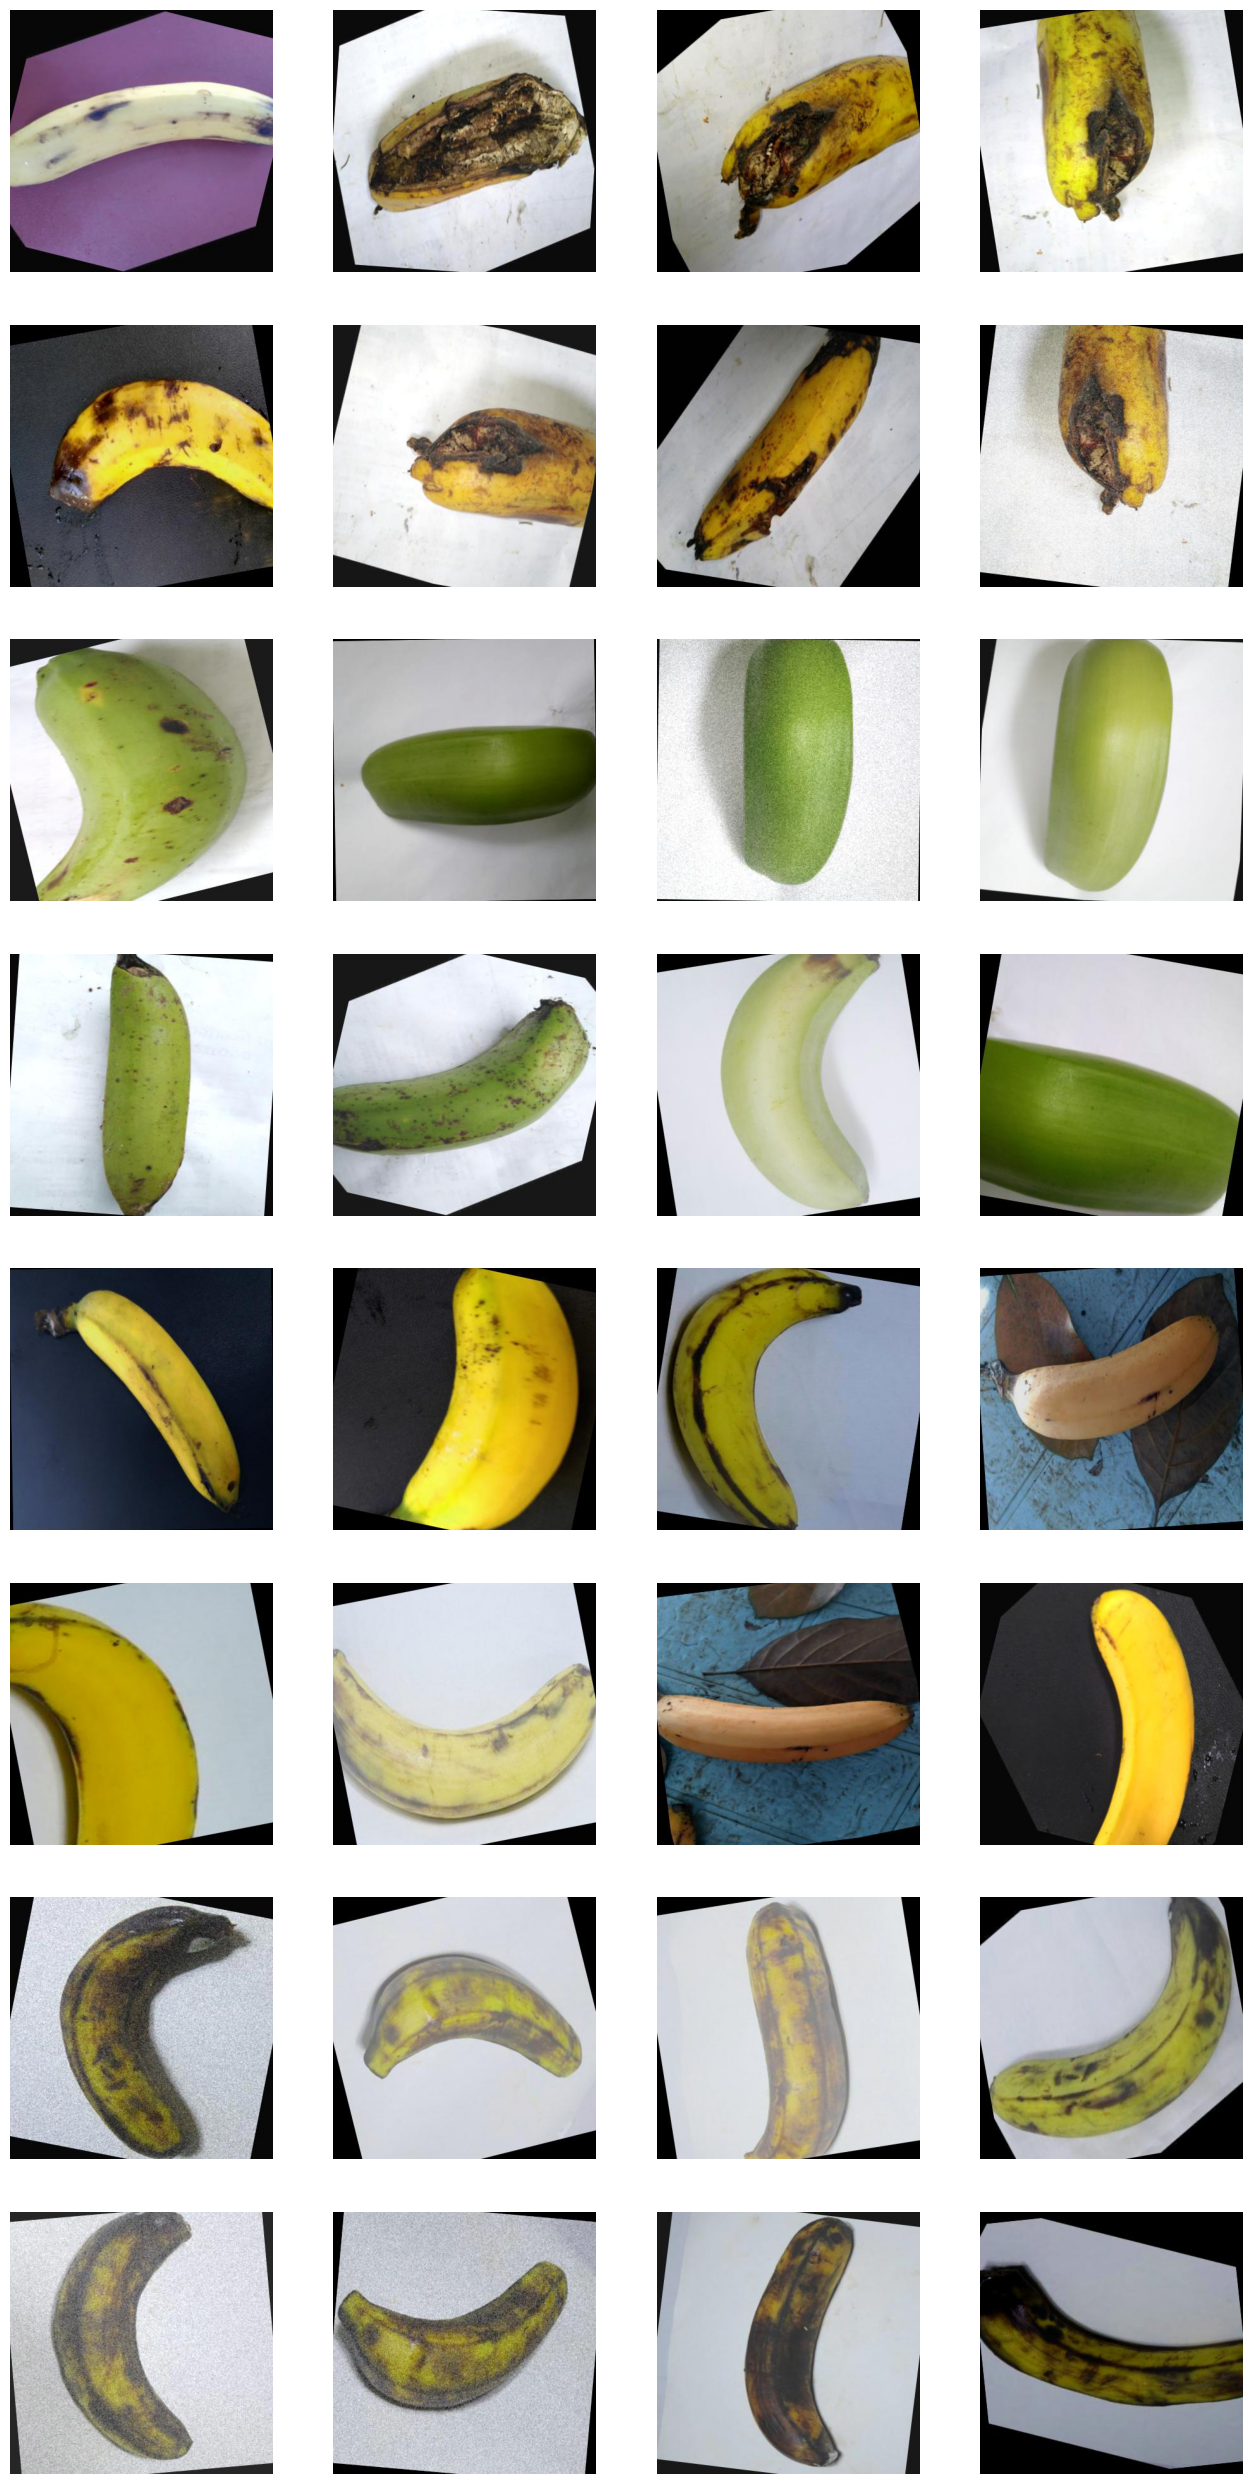

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8

next_rotten_pix = [os.path.join(train_rotten_dir, fname) 
                for fname in train_rotten_fnames[pic_index-8 : pic_index] 
               ]

next_unripe_pix = [os.path.join(train_unripe_dir, fname) 
                for fname in train_unripe_fnames[ pic_index-8 : pic_index]
               ]

next_ripe_pix = [os.path.join(train_ripe_dir, fname) 
                for fname in train_ripe_fnames[pic_index-8 : pic_index] 
               ]

next_overripe_pix = [os.path.join(train_overripe_dir, fname) 
                for fname in train_overripe_fnames[ pic_index-8 : pic_index]
               ]

for i, img_path in enumerate(next_rotten_pix + next_unripe_pix + next_ripe_pix + next_overripe_pix):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [7]:
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# **Self-Created Model Arch with Non-Augmented Data & No Callback(s)**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 256)       295168    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 17, 17, 256)     

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255.)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))     

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=32,
                                                        class_mode='categorical',
                                                        target_size=(150, 150))

Found 11793 images belonging to 4 classes.
Found 1685 images belonging to 4 classes.


In [ ]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator
    )

Epoch 1/50
369/369 [==============================] - 2574s 7s/step - loss: 0.6308 - accuracy: 0.7598 - val_loss: 0.3821 - val_accuracy: 0.8623
Epoch 2/50
369/369 [==============================] - 63s 170ms/step - loss: 0.2705 - accuracy: 0.8990 - val_loss: 0.1996 - val_accuracy: 0.9323
Epoch 3/50
369/369 [==============================] - 64s 173ms/step - loss: 0.1924 - accuracy: 0.9306 - val_loss: 0.1862 - val_accuracy: 0.9377
Epoch 4/50
369/369 [==============================] - 64s 174ms/step - loss: 0.1517 - accuracy: 0.9479 - val_loss: 0.2346 - val_accuracy: 0.9217
Epoch 5/50
369/369 [==============================] - 65s 175ms/step - loss: 0.1238 - accuracy: 0.9555 - val_loss: 0.1707 - val_accuracy: 0.9424
Epoch 6/50
369/369 [==============================] - 66s 178ms/step - loss: 0.0984 - accuracy: 0.9646 - val_loss: 0.6579 - val_accuracy: 0.8018
Epoch 7/50
369/369 [==============================] - 67s 180ms/step - loss: 0.0723 - accuracy: 0.9733 - val_loss: 0.1708 - val_acc

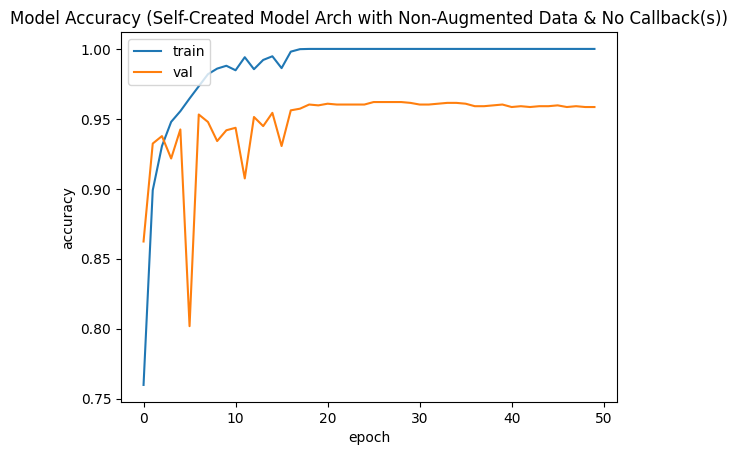

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy (Self-Created Model Arch with Non-Augmented Data & No Callback(s))')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

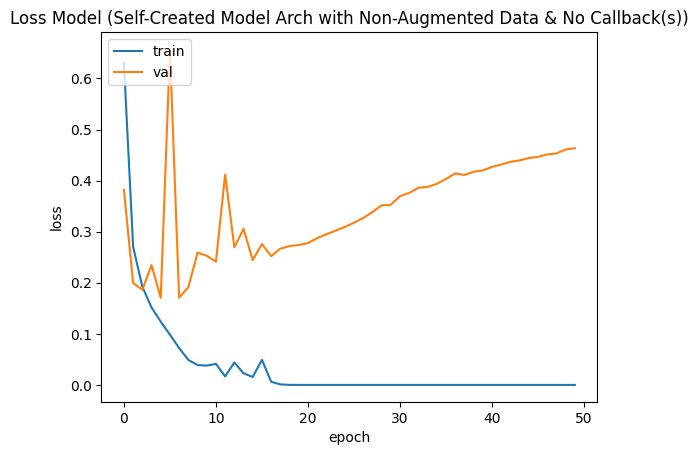

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model (Self-Created Model Arch with Non-Augmented Data & No Callback(s))')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# **Self-Created Model Arch with Augmented Data & Callback(s)**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 256)       295168    
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 256)     

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=80,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255.)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))     

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=32,
                                                        class_mode='categorical',
                                                        target_size=(150, 150))

Found 11793 images belonging to 4 classes.
Found 1685 images belonging to 4 classes.


In [ ]:
# Defining Callbacks

# Save the best model
file_path = '/content/checkpoint/self_created'
checkpoint_callback = ModelCheckpoint(filepath=file_path, save_best_only=True, monitor='val_accuracy', verbose=2)

# Early stopping
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=2, min_lr=1e-6)

callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [ ]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=callbacks
    )

Epoch 1/50
369/369 [==============================] - ETA: 0s - loss: 0.7680 - accuracy: 0.6748
Epoch 1: val_accuracy improved from -inf to 0.85163, saving model to /content/checkpoint/self_created
369/369 [==============================] - 125s 334ms/step - loss: 0.7680 - accuracy: 0.6748 - val_loss: 0.3816 - val_accuracy: 0.8516 - lr: 0.0010
Epoch 2/50
369/369 [==============================] - ETA: 0s - loss: 0.3772 - accuracy: 0.8556
Epoch 2: val_accuracy did not improve from 0.85163
369/369 [==============================] - 119s 321ms/step - loss: 0.3772 - accuracy: 0.8556 - val_loss: 0.5542 - val_accuracy: 0.7958 - lr: 0.0010
Epoch 3/50
369/369 [==============================] - ETA: 0s - loss: 0.3061 - accuracy: 0.8910
Epoch 3: val_accuracy improved from 0.85163 to 0.91217, saving model to /content/checkpoint/self_created
369/369 [==============================] - 121s 328ms/step - loss: 0.3061 - accuracy: 0.8910 - val_loss: 0.2503 - val_accuracy: 0.9122 - lr: 0.0010
Epoch 4/50

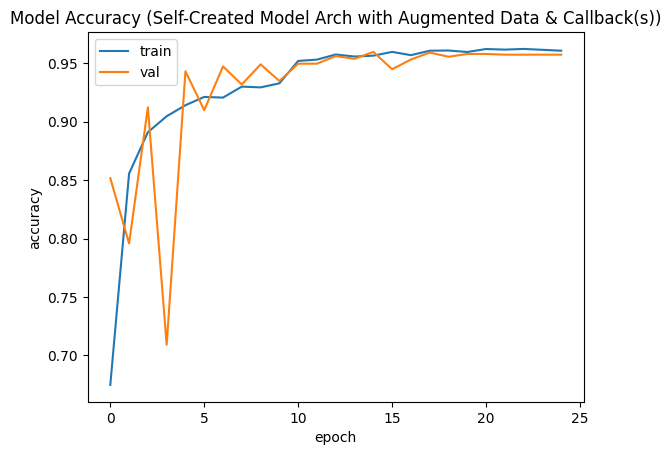

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy (Self-Created Model Arch with Augmented Data & Callback(s))')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

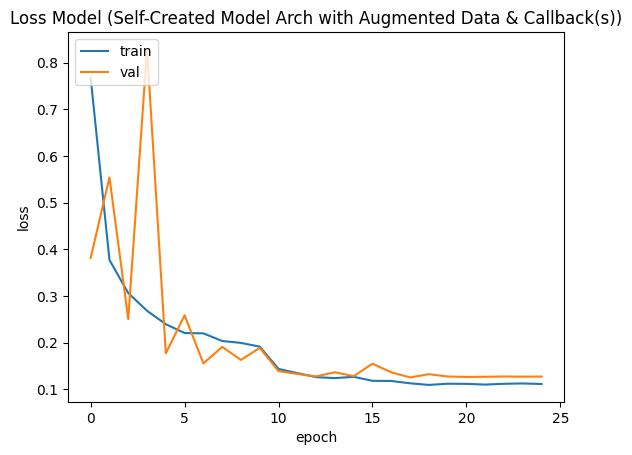

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model (Self-Created Model Arch with Augmented Data & Callback(s))')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# **Transfer Learning (Xception) with Augmented Data & Callback(s)**

In [ ]:
from tensorflow.keras.applications import Xception

In [ ]:
model = tf.keras.models.Sequential([
    # Xception Layer
    Xception(include_top=False, weights='imagenet', input_shape=(224, 224, 3)),
    # Max Pooling Layer
    tf.keras.layers.GlobalMaxPooling2D(),
    # Drop Out Layer
    tf.keras.layers.Dropout(0.2),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Output
    tf.keras.layers.Dense(4, activation='softmax') 
])

model.layers[0].trainable = False

83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 21,387,052
Trainable params: 525,572
Non-trainable params: 20,861,480
______________________________________

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=80,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255.)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(224, 224))     

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=32,
                                                        class_mode='categorical',
                                                        target_size=(224, 224))

Found 11803 images belonging to 4 classes.
Found 1685 images belonging to 4 classes.


In [ ]:
# Defining Callbacks

# Save the best model
file_path = '/content/checkpoint/xception'
checkpoint_callback = ModelCheckpoint(filepath=file_path, save_best_only=True, monitor='val_accuracy', verbose=2)

# Early stopping
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=2, min_lr=1e-6)

callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [ ]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=callbacks
    )

Epoch 1/50
369/369 [==============================] - ETA: 0s - loss: 0.4565 - accuracy: 0.8556
Epoch 1: val_accuracy improved from -inf to 0.92938, saving model to /content/checkpoint/xception
369/369 [==============================] - 4055s 11s/step - loss: 0.4565 - accuracy: 0.8556 - val_loss: 0.2015 - val_accuracy: 0.9294 - lr: 0.0010
Epoch 2/50
369/369 [==============================] - ETA: 0s - loss: 0.2460 - accuracy: 0.9108
Epoch 2: val_accuracy improved from 0.92938 to 0.93234, saving model to /content/checkpoint/xception
369/369 [==============================] - 218s 591ms/step - loss: 0.2460 - accuracy: 0.9108 - val_loss: 0.2039 - val_accuracy: 0.9323 - lr: 0.0010
Epoch 3/50
369/369 [==============================] - ETA: 0s - loss: 0.2146 - accuracy: 0.9245
Epoch 3: val_accuracy did not improve from 0.93234
369/369 [==============================] - 201s 545ms/step - loss: 0.2146 - accuracy: 0.9245 - val_loss: 0.2083 - val_accuracy: 0.9258 - lr: 0.0010
Epoch 4/50
369/369 

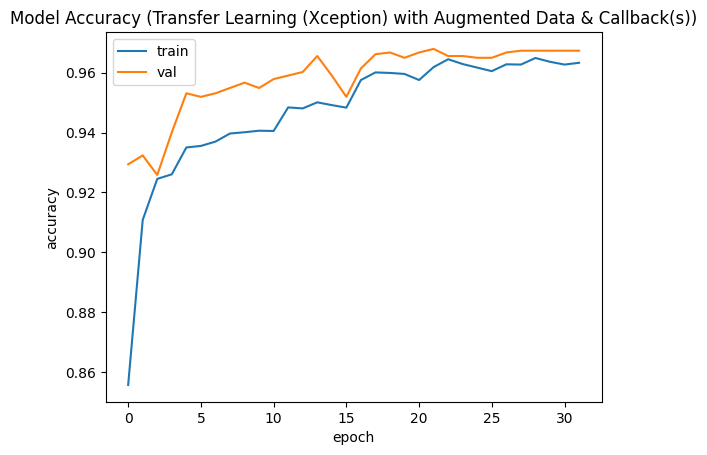

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy (Transfer Learning (Xception) with Augmented Data & Callback(s))')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

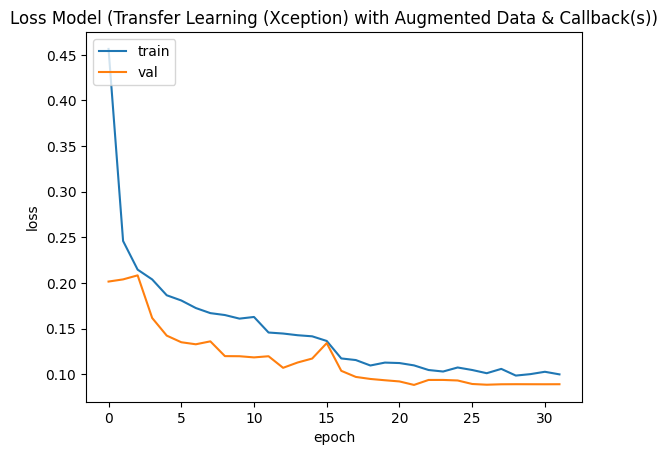

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model (Transfer Learning (Xception) with Augmented Data & Callback(s))')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
!zip -r /content/banana_xception.zip /content/checkpoint/xception

  adding: content/checkpoint/xception/ (stored 0%)
  adding: content/checkpoint/xception/saved_model.pb (deflated 92%)
  adding: content/checkpoint/xception/keras_metadata.pb (deflated 96%)
  adding: content/checkpoint/xception/variables/ (stored 0%)
  adding: content/checkpoint/xception/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: content/checkpoint/xception/variables/variables.index (deflated 76%)
  adding: content/checkpoint/xception/assets/ (stored 0%)
  adding: content/checkpoint/xception/fingerprint.pb (stored 0%)


In [ ]:
from google.colab import files

files.download("/content/banana_xception.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Transfer Learning (MobileNetV2) with Augmented Data & Callback(s)**

In [ ]:
from tensorflow.keras.applications import MobileNetV2

In [ ]:
model = tf.keras.models.Sequential([
    # MobileNetV2 Layer
    MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3)),
    # Max Pooling Layer
    tf.keras.layers.GlobalMaxPooling2D(),
    # Drop Out Layer
    tf.keras.layers.Dropout(0.2),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Output
    tf.keras.layers.Dense(4, activation='softmax') 
])

model.layers[0].trainable = False

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_max_pooling2d_2 (Glo  (None, 1280)             0         
 balMaxPooling2D)                                                
                                                                 
 dropout_2 (Dropout)         (None, 1280)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               327936    
                                                                 
 dense_5 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 2,586,948
Trainable params: 328,964
Non-

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=80,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255.)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(224, 224))     

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=32,
                                                        class_mode='categorical',
                                                        target_size=(224, 224))

Found 11803 images belonging to 4 classes.
Found 1685 images belonging to 4 classes.


In [ ]:
# Defining Callbacks

# Save the best model
file_path = '/content/checkpoint/mobilenetv2'
checkpoint_callback = ModelCheckpoint(filepath=file_path, save_best_only=True, monitor='val_accuracy', verbose=2)

# Early stopping
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=2, min_lr=1e-6)

callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [ ]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=callbacks
    )

Epoch 1/50
369/369 [==============================] - ETA: 0s - loss: 0.6844 - accuracy: 0.8247
Epoch 1: val_accuracy improved from -inf to 0.89436, saving model to /content/checkpoint/mobilenetv2
369/369 [==============================] - 224s 599ms/step - loss: 0.6844 - accuracy: 0.8247 - val_loss: 0.2972 - val_accuracy: 0.8944 - lr: 0.0010
Epoch 2/50
369/369 [==============================] - ETA: 0s - loss: 0.2886 - accuracy: 0.8981
Epoch 2: val_accuracy did not improve from 0.89436
369/369 [==============================] - 190s 514ms/step - loss: 0.2886 - accuracy: 0.8981 - val_loss: 0.3204 - val_accuracy: 0.8807 - lr: 0.0010
Epoch 3/50
369/369 [==============================] - ETA: 0s - loss: 0.2582 - accuracy: 0.9069
Epoch 3: val_accuracy improved from 0.89436 to 0.92878, saving model to /content/checkpoint/mobilenetv2
369/369 [==============================] - 211s 572ms/step - loss: 0.2582 - accuracy: 0.9069 - val_loss: 0.2000 - val_accuracy: 0.9288 - lr: 0.0010
Epoch 4/50
3

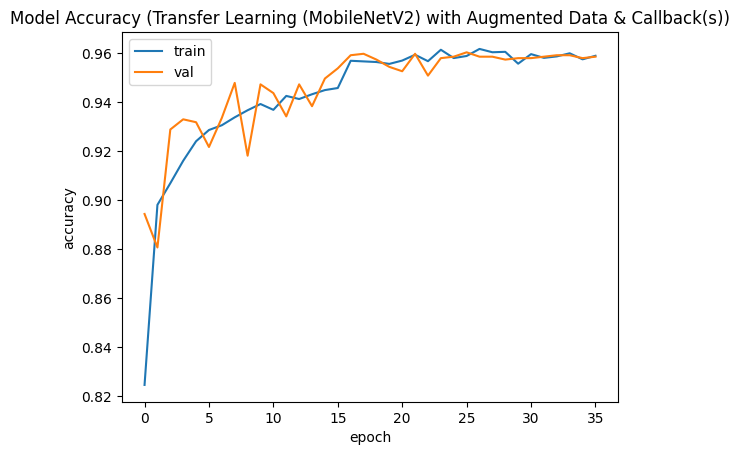

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy (Transfer Learning (MobileNetV2) with Augmented Data & Callback(s))')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

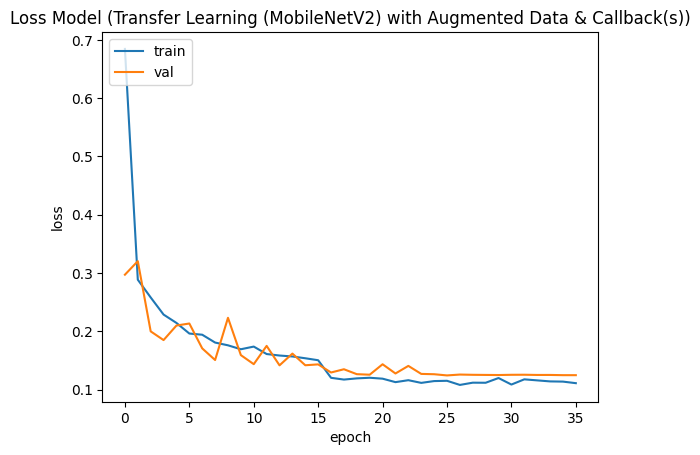

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model (Transfer Learning (MobileNetV2) with Augmented Data & Callback(s))')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
!zip -r /content/banana_mobilenetv2.zip /content/checkpoint/mobilenetv2

  adding: content/checkpoint/mobilenetv2/ (stored 0%)
  adding: content/checkpoint/mobilenetv2/saved_model.pb (deflated 91%)
  adding: content/checkpoint/mobilenetv2/keras_metadata.pb (deflated 96%)
  adding: content/checkpoint/mobilenetv2/variables/ (stored 0%)
  adding: content/checkpoint/mobilenetv2/variables/variables.data-00000-of-00001 (deflated 14%)
  adding: content/checkpoint/mobilenetv2/variables/variables.index (deflated 76%)
  adding: content/checkpoint/mobilenetv2/assets/ (stored 0%)
  adding: content/checkpoint/mobilenetv2/fingerprint.pb (stored 0%)


In [ ]:
files.download("/content/banana_mobilenetv2.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Transfer Learning (Densenet121) with Augmented Data & Callback(s)**

In [9]:
from tensorflow.keras.applications import DenseNet121

In [10]:
model = tf.keras.models.Sequential([
    # DenseNet121 Layer
    DenseNet121(include_top=False, weights='imagenet', input_shape=(224, 224, 3)),
    # Max Pooling Layer
    tf.keras.layers.GlobalMaxPooling2D(),
    # Drop Out Layer
    tf.keras.layers.Dropout(0.2),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Output
    tf.keras.layers.Dense(4, activation='softmax') 
])

model.layers[0].trainable = False

29084464/29084464 [==============================] - 0s 0us/step


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_max_pooling2d (Globa  (None, 1024)             0         
 lMaxPooling2D)                                                  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 7,300,932
Trainable params: 263,428
Non-trainable params: 7,037,504
________________________________________

In [12]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=80,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255.)

In [14]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(224, 224))     

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=32,
                                                        class_mode='categorical',
                                                        target_size=(224, 224))

Found 11793 images belonging to 4 classes.
Found 1685 images belonging to 4 classes.


In [15]:
# Defining Callbacks

# Save the best model
file_path = '/content/checkpoint/densenet121'
checkpoint_callback = ModelCheckpoint(filepath=file_path, save_best_only=True, monitor='val_accuracy', verbose=2)

# Early stopping
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=2, min_lr=1e-6)

callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [16]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=callbacks
    )

Epoch 1/50
369/369 [==============================] - ETA: 0s - loss: 0.5316 - accuracy: 0.8469
Epoch 1: val_accuracy improved from -inf to 0.93650, saving model to /content/checkpoint/densenet121
369/369 [==============================] - 2754s 7s/step - loss: 0.5316 - accuracy: 0.8469 - val_loss: 0.1918 - val_accuracy: 0.9365 - lr: 0.0010
Epoch 2/50
369/369 [==============================] - ETA: 0s - loss: 0.2794 - accuracy: 0.9011
Epoch 2: val_accuracy did not improve from 0.93650
369/369 [==============================] - 211s 571ms/step - loss: 0.2794 - accuracy: 0.9011 - val_loss: 0.2299 - val_accuracy: 0.9145 - lr: 0.0010
Epoch 3/50
369/369 [==============================] - ETA: 0s - loss: 0.2512 - accuracy: 0.9089
Epoch 3: val_accuracy improved from 0.93650 to 0.95312, saving model to /content/checkpoint/densenet121
369/369 [==============================] - 262s 711ms/step - loss: 0.2512 - accuracy: 0.9089 - val_loss: 0.1427 - val_accuracy: 0.9531 - lr: 0.0010
Epoch 4/50
369

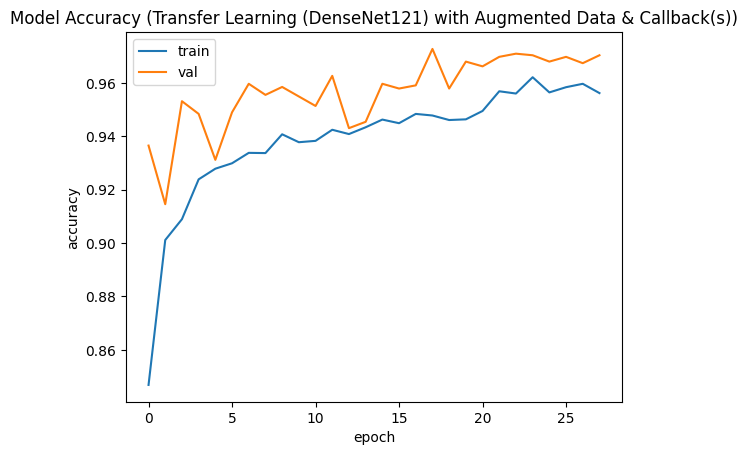

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy (Transfer Learning (DenseNet121) with Augmented Data & Callback(s))')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

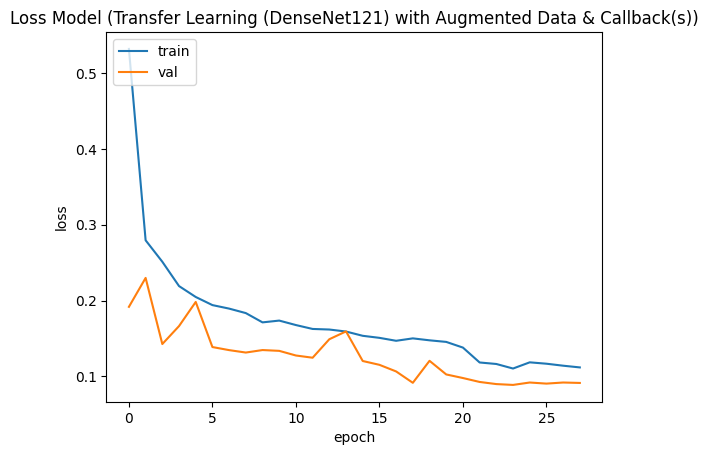

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model (Transfer Learning (DenseNet121) with Augmented Data & Callback(s))')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [19]:
!zip -r /content/banana_densenet121.zip /content/checkpoint/densenet121

  adding: content/checkpoint/densenet121/ (stored 0%)
  adding: content/checkpoint/densenet121/keras_metadata.pb (deflated 96%)
  adding: content/checkpoint/densenet121/assets/ (stored 0%)
  adding: content/checkpoint/densenet121/fingerprint.pb (stored 0%)
  adding: content/checkpoint/densenet121/variables/ (stored 0%)
  adding: content/checkpoint/densenet121/variables/variables.index (deflated 78%)
  adding: content/checkpoint/densenet121/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: content/checkpoint/densenet121/saved_model.pb (deflated 92%)


In [20]:
from google.colab import files

files.download("/content/banana_densenet121.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>